# 图像数据基本概念及操作

## 1. 图像数据基本操作

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

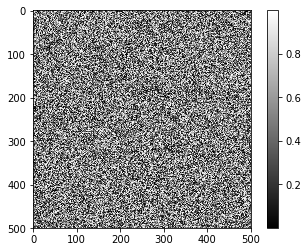

In [2]:
import numpy as np
from matplotlib import pyplot as plt

# 随机生成500x500的多维数组
random_image = np.random.random([500, 500])
# print(random_image)
plt.imshow(random_image, cmap='gray')
plt.colorbar()

In [3]:
# 加载灰度图像数据
img_gray_data = cv2.imread('./images/messi.jpg', cv2.IMREAD_GRAYSCALE)

print('数据类型:', type(img_gray_data))
print('数组类型:', img_gray_data.dtype)
print('数组形状：', img_gray_data.shape)
print('数组最大值：{}，最小值：{}'.format(img_gray_data.max(), img_gray_data.min()))

数据类型: <class 'numpy.ndarray'>
数组类型: uint8
数组形状： (342, 548)
数组最大值：253，最小值：0


In [4]:
# 加载RGB图像数据
img_rgb_data = cv2.imread('./images/messi.jpg', cv2.IMREAD_COLOR)

print('数据类型:', type(img_rgb_data))
print('数组类型:', img_rgb_data.dtype)
print('数组形状：', img_rgb_data.shape)
print('数组最大值：{}，最小值：{}'.format(img_rgb_data.max(), img_rgb_data.min()))

数据类型: <class 'numpy.ndarray'>
数组类型: uint8
数组形状： (342, 548, 3)
数组最大值：255，最小值：0


## 2. 显示图像

In [5]:
# 显示图像
# jupyter中使用esc键关闭窗口
cv2.imshow('gray', img_gray_data)
cv2.imshow('rgb', img_rgb_data)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 3. 像素值及访问操作

In [6]:
# 通过切片操作只显示某个通道上的图像数据
# OpenCV读取的图像数据通道排序为 BGR
cv2.imshow('B', img_rgb_data[:, :, 0])  # 颜色越接近蓝色，数值越大，亮度越亮
cv2.imshow('G', img_rgb_data[:, :, 1])
cv2.imshow('R', img_rgb_data[:, :, 2])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
# 使用split进行通道分割
b_data, g_data, r_data = cv2.split(img_rgb_data)
cv2.imshow('B', b_data)
cv2.imshow('G', g_data)
cv2.imshow('R', r_data)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
# 合并通道
bgr_data = cv2.merge((r_data, g_data, b_data))
cv2.imshow('color', bgr_data)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
# 在图片上叠加一个蓝色方块
img_rgb_data[10:110, 10:110, :] = [0, 0, 255]
cv2.imshow('color with blue box', img_rgb_data)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
# ROI
ball = img_rgb_data[280:340, 330:390, :]
cv2.imshow('ball', ball)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 4. 图像融合

In [11]:
# NumPy加法和OpenCV中加法的区别
x = np.uint8([250])
y = np.uint8([10])

print(cv2.add(x, y))  # 250 + 10 = 260 => 255
print(x + y)          # 250 + 10 = 260 % 256 = 4

[[255]]
[4]


In [14]:
img1 = cv2.imread('./images/python_ai.png')
img2 = cv2.imread('./images/python_logo.png')
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
dst = cv2.addWeighted(img1, 0.7, img2, 0.3, 0)
cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('./output/python_ai_logo.png', dst)

True

## 5. 色彩空间

In [15]:
img_gray_data = cv2.imread('./images/messi.jpg', cv2.IMREAD_GRAYSCALE)
img_bgr_data = cv2.cvtColor(img_gray_data, cv2.COLOR_GRAY2BGR)

cv2.imshow('gray', img_gray_data)
cv2.imshow('bgr', img_bgr_data)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
img_bgr_data = cv2.imread('./images/messi.jpg')
img_hsv_data = cv2.cvtColor(img_bgr_data, cv2.COLOR_BGR2HSV)

cv2.imshow('bgr', img_bgr_data)
cv2.imshow('hsv', img_hsv_data)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 6. 颜色直方图


In [17]:
img_gray_data = cv2.imread('./images/messi.jpg', cv2.IMREAD_GRAYSCALE)

hist, bins = np.histogram(img_gray_data.ravel(), bins=10)

print(hist)
print(bins)

[20458 34568 33355 28645 41040 15380  8186  3597  1212   975]
[  0.   25.3  50.6  75.9 101.2 126.5 151.8 177.1 202.4 227.7 253. ]


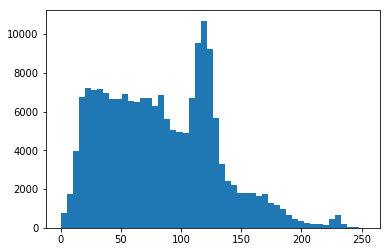

In [18]:
plt.hist(img_gray_data.ravel(), bins=50);

(array([ 1214.,  3437.,  5906.,  7038.,  6865.,  6822.,  6943.,  6724.,
         6204.,  5905.,  6401.,  5188.,  5144.,  5242.,  5008.,  5449.,
         6553.,  9125., 11910., 12573., 12042.,  6382.,  4624.,  3739.,
         3185.,  2925.,  2578.,  2387.,  2138.,  2020.,  2548.,  1781.,
         1537.,  1225.,   903.,   767.,   756.,   847.,   865.,   868.,
          832.,   492.,   427.,   589.,   418.,   191.,   175.,   213.,
          171.,   140.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <a list of 50 Patch objects>)

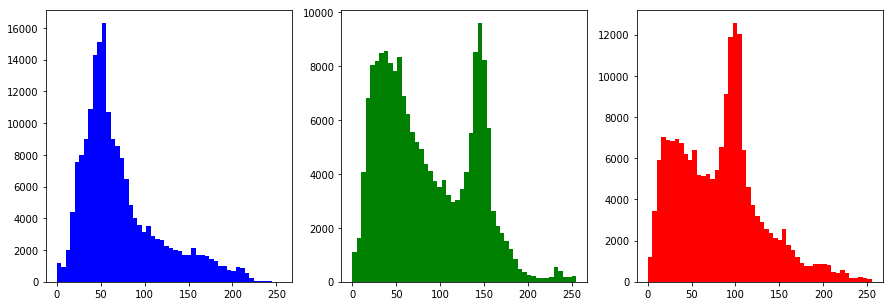

In [19]:
# 彩色图像直方图
img_bgr_data = cv2.imread('./images/messi.jpg')

plt.figure(figsize=(15, 5))

# B通道 直方图
ax1 = plt.subplot(131)
ax1.hist(img_bgr_data[:, :, 0].ravel(), bins=50, color='b')

# G通道 直方图
ax2 = plt.subplot(132)
ax2.hist(img_bgr_data[:, :, 1].ravel(), bins=50, color='g')

# # R通道 直方图
ax3 = plt.subplot(133)

ax3.hist(img_bgr_data[:, :, 2].ravel(), bins=50, color='r')

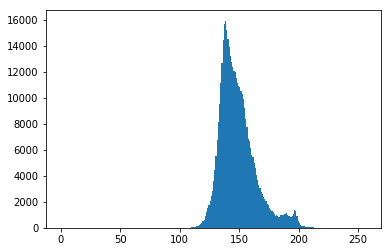

In [20]:
# 直方图均衡化
wiki_img = cv2.imread('./images/wiki.jpg', cv2.IMREAD_GRAYSCALE)

cv2.imshow('wiki_img', wiki_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.hist(wiki_img.ravel(), bins=256, range=[0, 256])
plt.show()

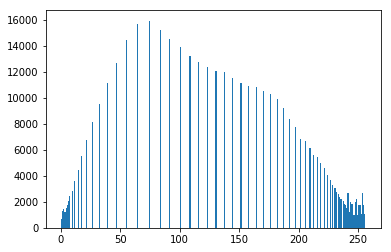

In [21]:
equ_wiki_img = cv2.equalizeHist(wiki_img)

cv2.imshow('equ_wiki_img', equ_wiki_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.hist(equ_wiki_img.ravel(), bins=256, range=[0, 256])
plt.show()

## 7. 图像滤波

### 7.1 中值滤波

In [22]:
img = cv2.imread('./images/nosiy_image.jpg', cv2.IMREAD_GRAYSCALE)
med1 = cv2.medianBlur(img, 3) # 3x3中值滤波
med2 =cv2.medianBlur(img, 5) # 5x5中值滤波

# 图像对比 
cv2.imshow('img', img)
cv2.imshow('med1', med1)
cv2.imshow('med2', med2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
img.dtype

dtype('uint8')

### 7.2 高斯滤波

In [24]:
img = cv2.imread('./images/camera.jpg', cv2.IMREAD_GRAYSCALE)
gas1 = cv2.GaussianBlur(img, (3, 3), 0) # 3x3
gas2 = cv2.GaussianBlur(img, (5, 5), 0) # 5x5

# 图像对比 
cv2.imshow('img', img)
cv2.imshow('gas1', gas1)
cv2.imshow('gas2', gas2)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 7.3 均值滤波

In [25]:
img = cv2.imread('./images/camera.jpg', cv2.IMREAD_GRAYSCALE)
mean1 = cv2.blur(img, (3, 3), 0) # 3x3
mean2 = cv2.blur(img, (5, 5), 0) # 5x5

# 图像对比 
cv2.imshow('img', img)
cv2.imshow('mean1', mean1)
cv2.imshow('mean2', mean2)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 8. 边缘检测

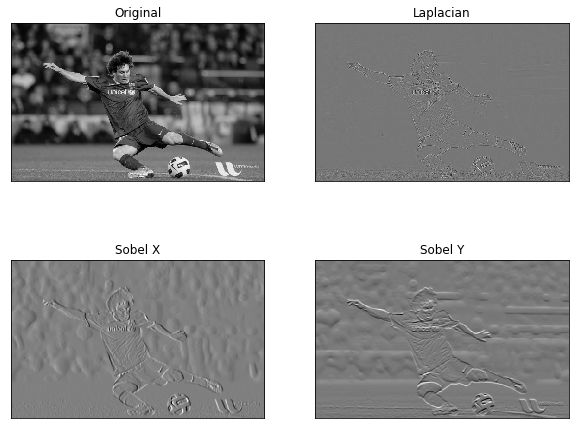

In [26]:
img = cv2.imread('./images/messi.jpg', cv2.IMREAD_GRAYSCALE)

laplacian = cv2.Laplacian(img, cv2.CV_64F)
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

# 图像对比 
plt.figure(figsize=(10, 8))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()